# Defining the Question

### a) Specifying the Question

### b) Understanding the context 

### c) Defining the Metric for Success

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Modelling
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

# Data Preparation

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Let import libraries that we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline


# set off the warnings that may appear
import warnings
warnings.filterwarnings(action='ignore') 

### Loading and Previewing our Dataset

In [3]:
# Loading the Dataset from the source i.e. csv
bitcoin = pd.read_csv('/content/drive/MyDrive/Moringa/Bitcoin/numeric_clean_bitcoin_data.csv')
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


## Checking the Data

In [4]:
# Determining the no. of records
#
bitcoin.shape

(3390, 26)

In [5]:
# Check for the top data
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


In [6]:
# check for the bottom data
bitcoin.tail()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
3385,3385,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0
3386,3386,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
3387,3387,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3388,3388,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0
3389,3389,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0


In [7]:
# Checking whether each column has an appropriate datatype
#
bitcoin.dtypes

Unnamed: 0            int64
Date                 object
price_bitcoin       float64
open_bitcoin        float64
high_bitcoin        float64
low_bitcoin         float64
vol_bitcoin         float64
Change_bitcoin_%    float64
price_dowjones      float64
open_dowjones       float64
high_dowjones       float64
low_dowjones        float64
vol_dowjones        float64
change_dowjones     float64
price_nasdaq        float64
open_nasdaq         float64
high_nasdaq         float64
low_nasdaq          float64
vol_nasdaq          float64
change_nasdaq       float64
price_sp            float64
open_sp             float64
high_sp             float64
low_sp              float64
change_sp           float64
trend_bitcoins      float64
dtype: object

In [8]:
# checking the dataset information
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3390 non-null   int64  
 1   Date              3390 non-null   object 
 2   price_bitcoin     3390 non-null   float64
 3   open_bitcoin      3390 non-null   float64
 4   high_bitcoin      3390 non-null   float64
 5   low_bitcoin       3390 non-null   float64
 6   vol_bitcoin       3390 non-null   float64
 7   Change_bitcoin_%  3390 non-null   float64
 8   price_dowjones    3390 non-null   float64
 9   open_dowjones     3390 non-null   float64
 10  high_dowjones     3390 non-null   float64
 11  low_dowjones      3390 non-null   float64
 12  vol_dowjones      3390 non-null   float64
 13  change_dowjones   3390 non-null   float64
 14  price_nasdaq      3390 non-null   float64
 15  open_nasdaq       3390 non-null   float64
 16  high_nasdaq       3390 non-null   float64


In [9]:
# check columns in our dataframe
bitcoin.columns

Index(['Unnamed: 0', 'Date', 'price_bitcoin', 'open_bitcoin', 'high_bitcoin',
       'low_bitcoin', 'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones',
       'open_dowjones', 'high_dowjones', 'low_dowjones', 'vol_dowjones',
       'change_dowjones', 'price_nasdaq', 'open_nasdaq', 'high_nasdaq',
       'low_nasdaq', 'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp',
       'high_sp', 'low_sp', 'change_sp', 'trend_bitcoins'],
      dtype='object')

# Data Cleaning

In [10]:
# drop irrelevant column
bitcoin.drop(['Unnamed: 0'],1, inplace=True)
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


# Exploratory Data Analysis

##Univariate

In [11]:
# get the summary of the data
bitcoin.describe()

,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,4850.477050,4831.802065,4980.469941,4678.190295,153.725215,2.950097,20400.049708,20395.216599,20497.556224,20286.977767,226.410676,0.653431,6076.916838,6075.811985,6110.343286,6035.825516,451.052168,0.787277,2320.568519,2319.964401,2331.230558,2307.618162,0.656038,40.965192
std,8941.774175,8886.039787,9191.083883,8588.376672,217.048855,7.225709,5314.104154,5313.436249,5344.931938,5279.644256,149.543415,0.817424,2583.407492,2583.165326,2602.040979,2557.902701,192.494649,0.866163,644.050892,643.828396,647.420898,639.713071,0.795666,25.781912
min,4.200000,4.200000,4.400000,3.900000,0.400000,0.000000,12101.460000,12101.080000,12143.690000,12035.090000,33.640000,0.000000,2648.360000,2639.900000,2653.180000,2627.230000,1.000000,0.000000,1277.060000,1258.860000,1278.730000,1258.860000,0.000000,0.000000
25%,246.125000,245.575000,251.600000,240.300000,25.557500,0.600000,16358.207500,16355.425000,16453.220000,16244.650000,103.260000,0.170000,4244.020000,4250.710000,4269.235000,4221.950000,387.102500,0.230000,1872.272500,1873.982500,1879.962500,1863.260000,0.170000,18.000000
50%,711.000000,710.400000,733.300000,685.100000,63.175000,1.560000,18270.530000,18284.410000,18322.635000,18202.250000,178.360000,0.420000,5211.015000,5203.700000,5228.110000,5181.435000,451.285000,0.540000,2151.735000,2155.830000,2163.545000,2141.740000,0.430000,42.000000
75%,7315.675000,7296.550000,7460.225000,7129.325000,156.467500,3.570000,25309.200000,25269.245000,25432.420000,25078.720000,320.880000,0.860000,7637.010000,7610.390000,7686.192500,7563.352500,527.650000,1.050000,2789.777500,2790.022500,2802.815000,2772.727500,0.860000,55.000000
max,63540.900000,63544.200000,64778.000000,62557.400000,999.530000,336.840000,33874.690000,33775.060000,33910.590000,33668.950000,922.680000,12.930000,14095.470000,14152.210000,14175.120000,13995.450000,994.330000,12.320000,4141.840000,4140.400000,4151.970000,4138.200000,11.980000,100.000000


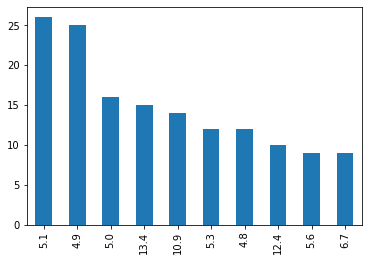

In [12]:
bitcoin['price_bitcoin'].value_counts().head(10).plot.bar()

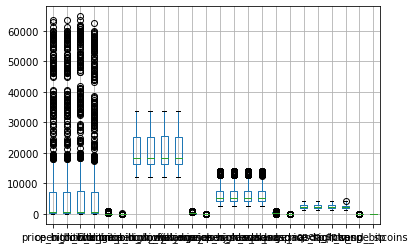

In [13]:
bitcoin.plot.box(grid='True')

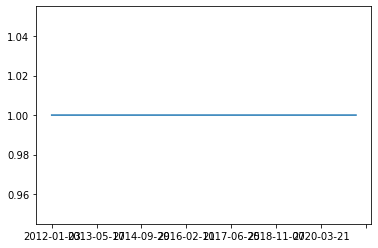

In [14]:
bitcoin['Date'].value_counts().sort_index().plot.line()

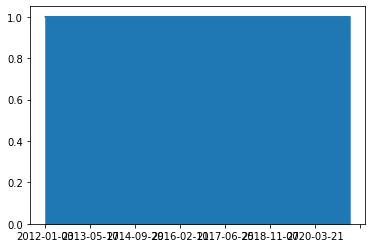

In [15]:
bitcoin['Date'].value_counts().sort_index().plot.area()

##Bivariate

##Multivariate

###a)PCA

###b)LDA

# Feature Engineering

# Implementing the Solution 

## Modelling

In [ ]:
bitcoin_copy = bitcoin.copy()
bitcoin_copy.rename(columns={'Date':'ds'},inplace=True)
bitcoin_copy.head()

# Learning

In [16]:
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


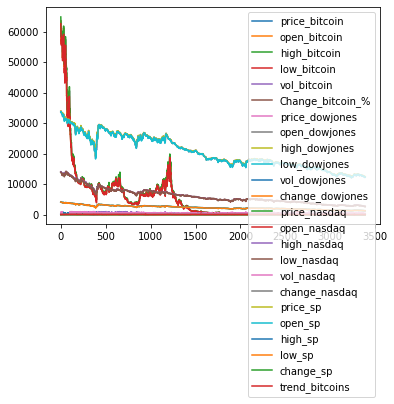

In [17]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# # plot the time series
bitcoin.plot()
pyplot.show()

In [18]:
ds= bitcoin['Date']
col= bitcoin.drop(['Date'],1)

In [19]:
bitcoin.columns

Index(['Date', 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins'],
      dtype='object')

In [21]:
from fbprophet import Prophet
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
results = []
for col in cols:
    # subdf = df[['ds', col]].dropna()
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods = 90))
    results.append(result)
# df.predict = pd.concat(results, axis=1)
# df.predict.to_csv('example_file.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [22]:
results

[             ds         trend  ...  multiplicative_terms_upper          yhat
 0    2012-01-03   -378.552660  ...                         0.0    613.080681
 1    2012-01-04   -377.477518  ...                         0.0    691.691312
 2    2012-01-05   -376.402375  ...                         0.0    670.560963
 3    2012-01-06   -375.327233  ...                         0.0    740.984701
 4    2012-01-07   -374.252091  ...                         0.0    797.665189
 ...         ...           ...  ...                         ...           ...
 3475 2021-07-09  35015.922262  ...                         0.0  34520.629136
 3476 2021-07-10  35059.471726  ...                         0.0  34572.631232
 3477 2021-07-11  35103.021190  ...                         0.0  34591.158157
 3478 2021-07-12  35146.570654  ...                         0.0  34645.013932
 3479 2021-07-13  35190.120118  ...                         0.0  34680.644330
 
 [3480 rows x 19 columns],
              ds         trend  ...

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


              ds  price_bitcoin  open_bitcoin  ...   low_sp  change_sp     y
3373  2012-01-19            6.4           5.9  ...  1308.07       0.49  24.0
3374  2012-01-18            5.9           5.6  ...  1290.99       1.11  58.0
3375  2012-01-17            5.6           6.7  ...  1290.22       0.36  12.0
3376  2012-01-16            6.7           7.0  ...  1277.58       0.49  36.0
3377  2012-01-15            7.0           6.8  ...  1277.58       0.49  21.0

[5 rows x 25 columns]
MAE: 64.989


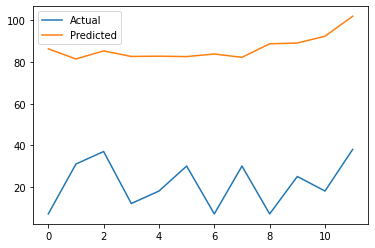

In [24]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# prepare expected column names
# df.columns = ['ds', 'y']
# df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
# results = []
for col in cols:
    # subdf = df[['ds', col]].dropna()
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
train = subdf.drop(subdf.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = subdf['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [3]:
import pandas_datareader as web
df = web.DataReader('BTC-USD',data_source='yahoo', start='2012-01-01', end='2021-04-19')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-04-15,63594.722656,60222.531250,63258.503906,61572.789062,8.429301e+10,61572.789062
2021-04-16,62572.175781,60361.351562,61529.921875,60683.820312,6.613876e+10,60683.820312
2021-04-17,61057.457031,52829.535156,60701.886719,56216.183594,9.746887e+10,56216.183594


# Main one

In [26]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [27]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [28]:
bitcoin

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0
3386,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
3387,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3388,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0


In [29]:

df = bitcoin.filter(['Date','price_bitcoin'])
df.head()

,Date,price_bitcoin
0,2021-04-14,62795.9
1,2021-04-13,63540.9
2,2021-04-12,59863.8
3,2021-04-11,59978.7
4,2021-04-10,59748.4


In [30]:
df.index[df['price_bitcoin'] < 0]

Int64Index([], dtype='int64')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


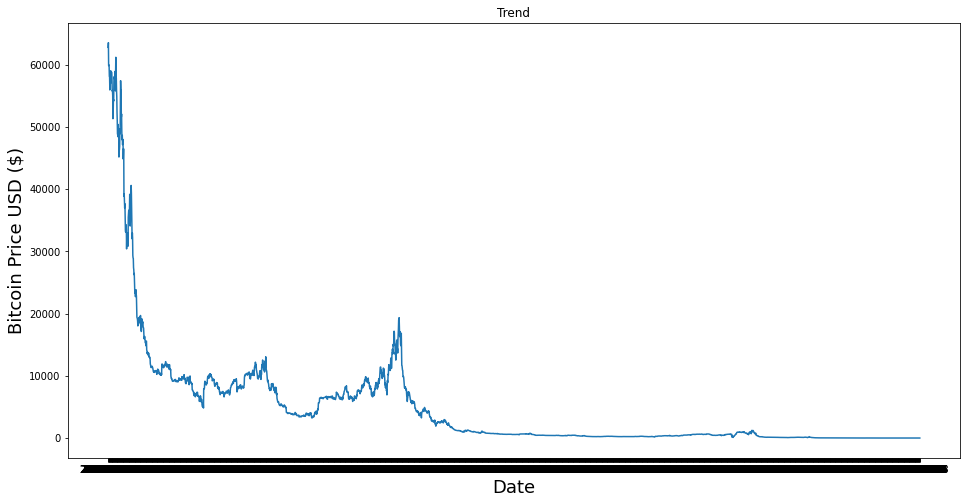

In [31]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['price_bitcoin'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Bitcoin Price USD ($)', fontsize=18)
plt.show()

In [32]:
# yt = yt-y(t-1) 
df['price_shift'] = df['price_bitcoin'] - df['price_bitcoin'].shift(1)
y = df['price_shift']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


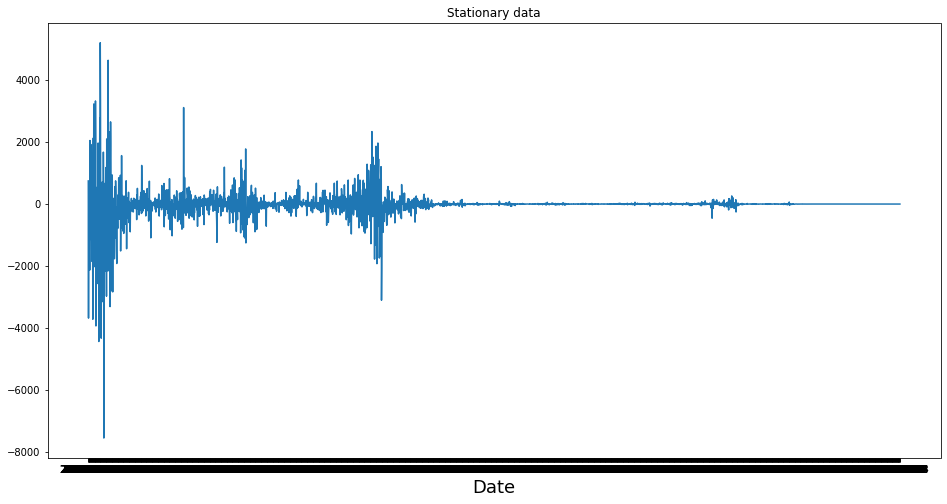

In [33]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['price_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [34]:
model = Prophet()

In [35]:
df.columns

Index(['Date', 'price_bitcoin', 'price_shift'], dtype='object')

In [36]:
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
results = []
for col in cols:
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods = 90))
    results.append(result)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [37]:
## Split the Data
train_data_len1 = int(0.8*len(bitcoin_copy))
train_data_len1

2712

In [38]:
df_train1 = subdf[:train_data_len1]
df_test1 = subdf[train_data_len1:]
df_train1.head(), df_train1.shape

(           ds  price_bitcoin  open_bitcoin  ...   low_sp  change_sp     y
 0  2021-04-14        62795.9       63544.2  ...  4138.20       0.01  45.0
 1  2021-04-13        63540.9       59863.6  ...  4124.43       0.33  45.0
 2  2021-04-12        59863.8       59982.1  ...  4114.82       0.02  45.0
 3  2021-04-11        59978.7       59772.4  ...  4095.51       0.77  45.0
 4  2021-04-10        59748.4       58127.4  ...  4095.51       0.77  46.0
 
 [5 rows x 25 columns], (2712, 25))

In [39]:
model.fit(df_train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
periods1 = len(bitcoin_copy)-len(df_train1)
periods1

678

In [47]:
# Create Future Datas of len(df)-len(df_train) days
future_dates1 = model.make_future_dataframe(periods=periods1)

In [48]:
# Shape after adding 401 days
future_dates1.shape

(3390, 1)

In [50]:
future_dates1.head()

,ds
0,2013-11-11
1,2013-11-12
2,2013-11-13
3,2013-11-14
4,2013-11-15


In [51]:
# Make Prediction 
prediction = model.predict(future_dates1)

In [52]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-11-11,30.622561,9.025094,53.659628,30.622561,30.622561,0.854436,0.854436,0.854436,0.328534,0.328534,0.328534,0.525901,0.525901,0.525901,0.0,0.0,0.0,31.476997
1,2013-11-12,30.656519,8.972461,55.246850,30.656519,30.656519,1.580017,1.580017,1.580017,0.835269,0.835269,0.835269,0.744748,0.744748,0.744748,0.0,0.0,0.0,32.236536
2,2013-11-13,30.690476,10.843139,56.248489,30.690476,30.690476,2.244362,2.244362,2.244362,1.197475,1.197475,1.197475,1.046886,1.046886,1.046886,0.0,0.0,0.0,32.934838
3,2013-11-14,30.724433,10.655352,57.534985,30.724433,30.724433,3.050372,3.050372,3.050372,1.623420,1.623420,1.623420,1.426951,1.426951,1.426951,0.0,0.0,0.0,33.774805
4,2013-11-15,30.758391,11.241140,55.235920,30.758391,30.758391,1.784738,1.784738,1.784738,-0.092663,-0.092663,-0.092663,1.877402,1.877402,1.877402,0.0,0.0,0.0,32.543129


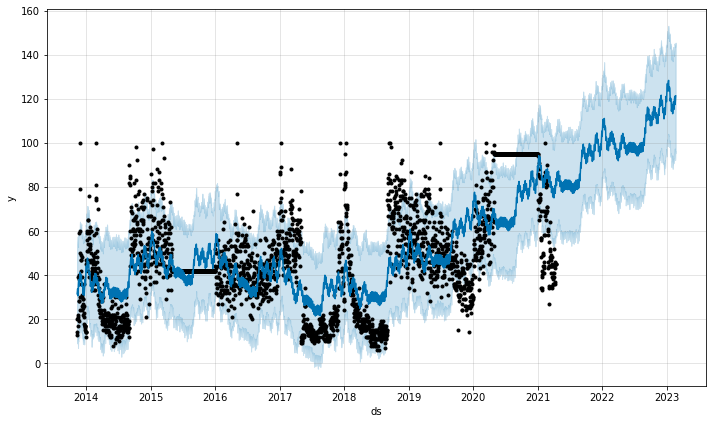

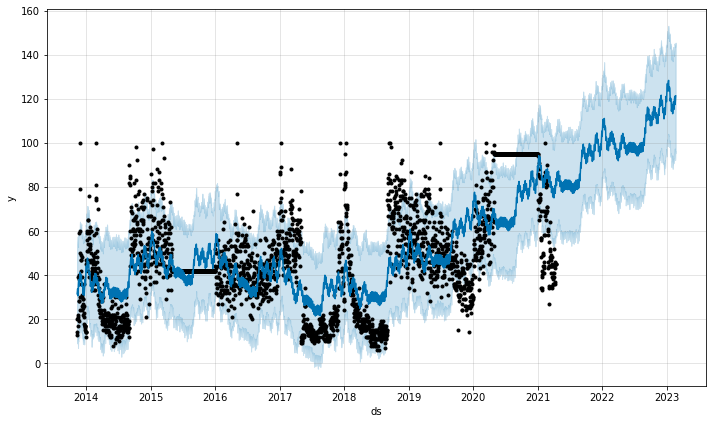

In [53]:
# Plot Our Predictions
model.plot(prediction)

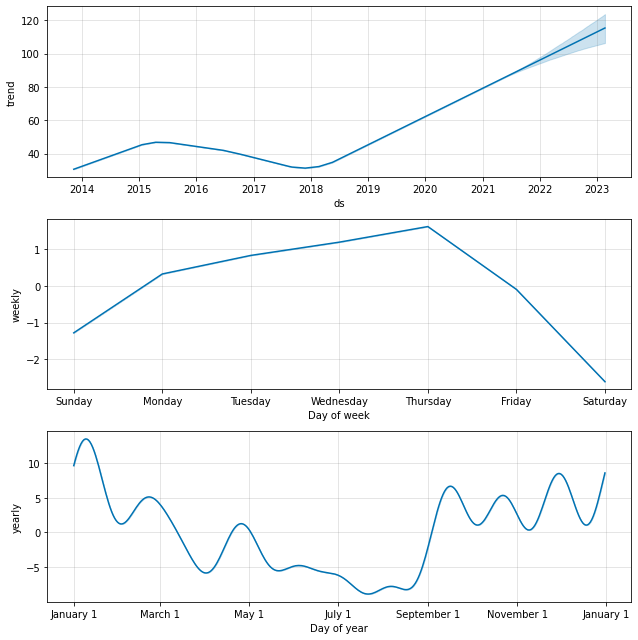

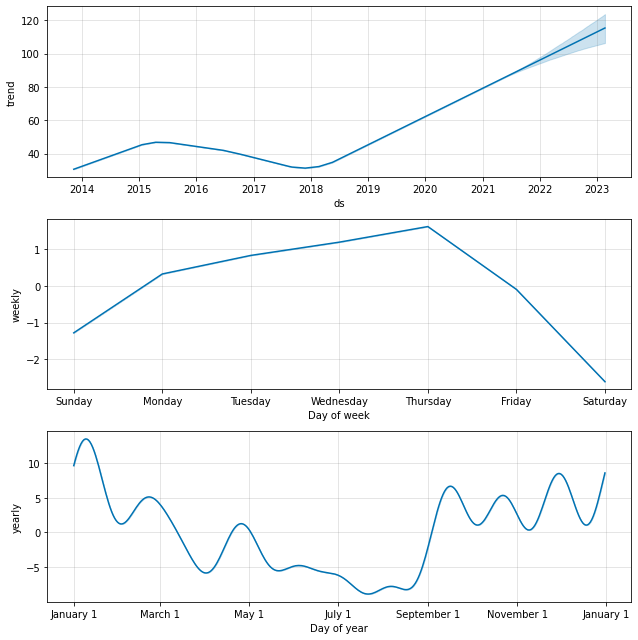

In [54]:
model.plot_components(prediction)

### Predicting the Test dataset

# Challenging the Solution

# Recommendations




# Follow up questions

## a). Did we have the right data?

## b). Do we need other data to answer our question? 

## c). Did we have the right question? 

# Conclusion